In [1]:
import json
import random


# Taking random 1000 business entries from the "yelp_academic_dataset_business" file (NO NEED TO RUN)

In [3]:
# Initialize an empty list to store businesses
businesses = []

# Load the data, assuming each line in the file is a separate JSON object
file_path = 'D:\\yelp_dataset\\yelp_academic_dataset_business.json'  # Update this path as necessary

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Load each line as a JSON object and append to the list
        business = json.loads(line)
        businesses.append(business)

# Now that we have all businesses loaded, we can select 1000 random businesses
random_businesses = random.sample(businesses, min(1000, len(businesses)))

# Extract only the required fields
filtered_businesses = [{'business_id': business['business_id'], 'stars': business['stars'], 'review_count': business['review_count']} for business in random_businesses]

with open('filtered_1000_businesses.json', 'w') as new_file:
    json.dump(filtered_businesses, new_file, indent=4)

print("New JSON file with 1000 random businesses created successfully.")


New JSON file with 1000 random businesses created successfully.


# Code to get the oldest year (NO NEED TO RUN)

In [2]:

def find_oldest_year(file_path):
    oldest_year = float('inf')  # Initialize with a very large number
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                review = json.loads(line)
                year = int(review['date'].split('-')[0])  # Extract year
                if year < oldest_year:
                    oldest_year = year
            except json.JSONDecodeError:
                continue  # Handles possible bad JSON lines
    
    return oldest_year

# Replace 'path_to_your_file' with the actual path to your Review.json file
file_path = 'D:\\yelp_dataset\\yelp_academic_dataset_review.json'
oldest_year = find_oldest_year(file_path)
print(f"The oldest year in the review file is: {oldest_year}")


The oldest year in the review file is: 2005


# Code to get a dataframe (Year, total_no_of_users) NO NEED TO RUN

In [12]:
import pandas as pd
from collections import defaultdict

filepath = 'D:\\yelp_dataset\\yelp_academic_dataset_user.json'  # Update this path as necessary


# Initialize a dictionary to hold the count of users per year
user_count_by_year = defaultdict(int)

# Open and process the User.json file
with open(filepath, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            user = json.loads(line)
            year = user['yelping_since'].split('-')[0]  # Extract the year
            user_count_by_year[year] += 1
        except json.JSONDecodeError:
            continue  # Skip lines that are not valid JSON

# Create a DataFrame
df = pd.DataFrame(list(user_count_by_year.items()), columns=['Year', 'Total_Users_by_year'])

# Ensure the DataFrame covers all years from 2005 to the current year
all_years = pd.DataFrame({'Year': [str(year) for year in range(2005, 2025)]})
df = pd.merge(all_years, df, on='Year', how='left').fillna(0)  # Replace 2025 with the current year + 1

# Convert 'Total Users' to integers
df['Total_Users_by_year'] = df['Total_Users_by_year'].astype(int)

print(df)


    Year  Total_Users_by_year
0   2005                  937
1   2006                 5423
2   2007                15340
3   2008                31097
4   2009                64911
5   2010               109054
6   2011               176435
7   2012               195955
8   2013               209762
9   2014               233465
10  2015               247850
11  2016               217620
12  2017               151024
13  2018               133568
14  2019               104655
15  2020                47444
16  2021                40485
17  2022                 2782
18  2023                    0
19  2024                    0


In [13]:
# Assuming your DataFrame is named df
print(df.dtypes)
total_users = df['Total_Users_by_year'].sum()
print(f"Total number of users: {total_users}")

Year                   object
Total_Users_by_year     int32
dtype: object
Total number of users: 1987807


In [5]:
# # Initialize a dictionary to hold the count of reviews per year
# review_count_by_year = defaultdict(int)

# filepath = 'D:\\yelp_dataset\\yelp_academic_dataset_review.json'

# # Open and process the Review.json file
# with open(filepath, 'r', encoding='utf-8') as file:
#     for line in file:
#         try:
#             review = json.loads(line)
#             year = review['date'].split('-')[0]  # Extract the year
#             review_count_by_year[year] += 1
#         except json.JSONDecodeError:
#             continue  # Skip lines that are not valid JSON

# # Create a DataFrame
# df_reviews = pd.DataFrame(list(review_count_by_year.items()), columns=['Year', 'Total_Reviews_by_Year'])

# # Ensure the DataFrame covers all years from 2005 to the current year
# current_year = pd.to_datetime("now").year
# all_years = pd.DataFrame({'Year': [str(year) for year in range(2005, current_year+1)]})
# df_reviews = pd.merge(all_years, df_reviews, on='Year', how='left').fillna(0)

# # Convert 'Total_Reviews_by_Year' to integers
# df_reviews['Total_Reviews_by_Year'] = df_reviews['Total_Reviews_by_Year'].astype(int)

# print(df_reviews)


In [6]:
# # Assuming your DataFrame is named df
# print(df_reviews.dtypes)
# total_reviews = df_reviews['Total_Reviews_by_Year'].sum()
# print(f"Total number of reviews: {total_reviews}")

# Code to get dataframe (Year, total no of reviews) NO NEED TO RUN

In [2]:
from collections import defaultdict
import json
import pandas as pd

# Initialize a dictionary to hold both the count of reviews and the sum of stars per year
review_stats_by_year = defaultdict(lambda: {'count': 0, 'stars_sum': 0})

filepath = 'D:\\yelp_dataset\\yelp_academic_dataset_review.json'

# Open and process the Review.json file
with open(filepath, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            review = json.loads(line)
            year = review['date'].split('-')[0]  # Extract the year
            review_stats_by_year[year]['count'] += 1  # Increment the count of reviews
            review_stats_by_year[year]['stars_sum'] += review['stars']  # Add the stars for this review
        except json.JSONDecodeError:
            continue  # Skip lines that are not valid JSON

# Convert the review_stats_by_year dictionary to a format suitable for DataFrame construction
data = []
for year, stats in review_stats_by_year.items():
    data.append([year, stats['count'], stats['stars_sum']])

# Create a DataFrame
df_reviews = pd.DataFrame(data, columns=['Year', 'Total_Reviews_By_Year', 'Total_Stars_By_Year'])

# Ensure the DataFrame covers all years from 2005 to the current year
current_year = pd.to_datetime("now").year
all_years = pd.DataFrame({'Year': [str(year) for year in range(2005, current_year+1)]})
df_reviews = pd.merge(all_years, df_reviews, on='Year', how='left').fillna(0)

# Convert 'Total_Reviews' and 'Total_Stars' to integers
df_reviews['Total_Reviews_By_Year'] = df_reviews['Total_Reviews_By_Year'].astype(int)
df_reviews['Total_Stars_By_Year'] = df_reviews['Total_Stars_By_Year'].astype(int)

print(df_reviews)


    Year  Total_Reviews_By_Year  Total_Stars_By_Year
0   2005                    854                 3331
1   2006                   3853                15393
2   2007                  15363                59369
3   2008                  48226               183204
4   2009                  74387               276679
5   2010                 138587               515748
6   2011                 230813               855077
7   2012                 286570              1054246
8   2013                 383950              1414335
9   2014                 522275              1944411
10  2015                 688415              2576034
11  2016                 758882              2857598
12  2017                 820048              3098620
13  2018                 906362              3427031
14  2019                 907284              3417355
15  2020                 554557              2097690
16  2021                 618189              2290226
17  2022                  31665               

In [4]:
# Assuming your DataFrame is named df
print(df_reviews.dtypes)
total_reviews = df_reviews['Total_Reviews_By_Year'].sum()
print(f"Total number of reviews: {total_reviews}")

Year                     object
Total_Reviews_By_Year     int32
Total_Stars_By_Year       int32
dtype: object
Total number of reviews: 6990280


In [10]:
#Creating the Average rating column
import numpy as np
# Add a new column 'Avg_Ratings'
df_reviews['Avg_Ratings'] = df_reviews['Total_Stars_By_Year'] / df_reviews['Total_Reviews_By_Year']

# Handle division by zero by replacing infinite values with NaN or another value
df_reviews['Avg_Ratings'].replace([np.inf, -np.inf], np.nan, inplace=True)

# If you want to fill NaN values with 0 or any other placeholder
df_reviews.fillna(0, inplace=True)

# Drop the 'Total_Stars_By_Year' column
df_reviews.drop(columns=['Total_Stars_By_Year'], inplace=True)

# Display the DataFrame to verify the new column
print(df_reviews)


    Year  Total_Reviews_By_Year  Avg_Ratings
0   2005                    854     3.900468
1   2006                   3853     3.995069
2   2007                  15363     3.864415
3   2008                  48226     3.798864
4   2009                  74387     3.719454
5   2010                 138587     3.721475
6   2011                 230813     3.704631
7   2012                 286570     3.678843
8   2013                 383950     3.683644
9   2014                 522275     3.722964
10  2015                 688415     3.741978
11  2016                 758882     3.765537
12  2017                 820048     3.778584
13  2018                 906362     3.781084
14  2019                 907284     3.766577
15  2020                 554557     3.782641
16  2021                 618189     3.704734
17  2022                  31665     3.704500
18  2023                      0     0.000000
19  2024                      0     0.000000


In [15]:
# Merging df and df_reviews on the 'Year' column
merged_df = pd.merge(df, df_reviews, on='Year', how='outer')

# Renaming columns to 'Year', 'Users', and 'Reviews'
merged_df.columns = ['Year', 'Total_Users', 'Total_Reviews','Average_Rating']

# Fill NaN values with 0 (assuming missing values mean no users or reviews for those years)
merged_df = merged_df.fillna(0)

# Convert 'Users' and 'Reviews' columns to integers
merged_df['Total_Users'] = merged_df['Total_Users'].astype(int)
merged_df['Total_Reviews'] = merged_df['Total_Reviews'].astype(int)
merged_df['Average_Rating'] = merged_df['Average_Rating'].astype(float)
# Using .iloc to select all rows except the last two
merged_df = merged_df.iloc[:-2]

print(merged_df)


    Year  Total_Users  Total_Reviews  Average_Rating
0   2005          937            854        3.900468
1   2006         5423           3853        3.995069
2   2007        15340          15363        3.864415
3   2008        31097          48226        3.798864
4   2009        64911          74387        3.719454
5   2010       109054         138587        3.721475
6   2011       176435         230813        3.704631
7   2012       195955         286570        3.678843
8   2013       209762         383950        3.683644
9   2014       233465         522275        3.722964
10  2015       247850         688415        3.741978
11  2016       217620         758882        3.765537
12  2017       151024         820048        3.778584
13  2018       133568         906362        3.781084
14  2019       104655         907284        3.766577
15  2020        47444         554557        3.782641
16  2021        40485         618189        3.704734
17  2022         2782          31665        3.

In [16]:
# Save the DataFrame to a CSV file
merged_df.to_csv('Year_VS_Users_VS_Reviews.csv', index=False)


# Code to get number of photos for the random 1000 businesses generated.

In [24]:
# photos_data=[]
# # Load data from businesses.json
# with open('filtered_1000_businesses.json', 'r') as f:
#     businesses_data = json.load(f)

# # # Load data from photos.json
# # with open('D:\\yelp_dataset\\photos.json', 'r') as f:
# #     photos_data = json.load(f)
# with open('D:\\yelp_dataset\\photos.json', 'r', encoding='utf-8') as file:
#     for line in file:
#         # Load each line as a JSON object and append to the list
#         photoObj = json.loads(line)
#         photos_data.append(photoObj)

# # Create a dictionary to store the counts for each business ID
# business_count = {}

# # Iterate over businesses in businesses.json
# for business in businesses_data:
#     business_id = business['business_id']
#     # Initialize count for each business ID
#     business_count[business_id] = 0
    
#     # Iterate over photos in photos.json
#     for photo in photos_data:
#         if photo['business_id'] == business_id:
#             # Increment count if the business ID matches
#             business_count[business_id] += 1

# # Print the counts for each business ID
# for business_id, count in business_count.items():
#     print(f"Business ID: {business_id}, Photo Count: {count}")


Business ID: 2gRTeejscv_v6wRN0Of7WQ, Photo Count: 0
Business ID: sMEsG9hzLSuxedG_MVR9OQ, Photo Count: 0
Business ID: VPng2_ntju1nSoI8FHqmbg, Photo Count: 0
Business ID: 9jzwouxuxZOV8vZMgQ7NFg, Photo Count: 2
Business ID: hj9P_RC8J936Nz4fAwy4qg, Photo Count: 0
Business ID: FonAdA9atQ7dqCkM0IF-AA, Photo Count: 0
Business ID: uGT2BZKB3t8Fi6vFTyM7zg, Photo Count: 1
Business ID: IYvAoKrKgFLoxuf7E8jN7g, Photo Count: 0
Business ID: 3vJOrpZxF2ctaM4hhpuu9A, Photo Count: 1
Business ID: MCDKORBcNIjKGF79sXFOcg, Photo Count: 0
Business ID: Btm9ODncqCqYsnpawaHioA, Photo Count: 23
Business ID: SxSPhtn-t2ESvXUX81EvLw, Photo Count: 0
Business ID: j_QRlMC5nRLFvywLtQ3_1A, Photo Count: 0
Business ID: G4mEyZGeS_4JOuAQWg2dJA, Photo Count: 0
Business ID: CHFiPMTgDWTXxGcKCZZwTQ, Photo Count: 0
Business ID: XMJpAFGy664IksWHaKNfGw, Photo Count: 0
Business ID: 5Z7VyIlPYa3SFHkG2PG6DQ, Photo Count: 0
Business ID: JhcAR32Mck-dXTMsz1OSFQ, Photo Count: 2
Business ID: x1ZLiXxH6zZ8u2kfMcVB7A, Photo Count: 0
Business ID

In [25]:
# Initialize a set to store unique labels
unique_labels = set()
# Loop through each photo entry in the JSON data
for photo_entry in photos_data:
    # Extract the label from the photo entry
    label = photo_entry.get('label')
    
    # If the label exists, add it to the set
    if label:
        unique_labels.add(label)

# Print the unique labels
print("Unique labels:")
for label in unique_labels:
    print(label)

Unique labels:
menu
drink
outside
inside
food


# Code to get random 500 businesses based on "food" and "drinks" label

# Don't run the below (Generats random set)

In [60]:
import random
# Initialize sets to store unique businesses with labels "food" and "drinks"
businesses_with_food_and_drinks = set()

# Loop through each photo entry in the JSON data
for photo_entry in photos_data:
    label = photo_entry.get('label')
    business_id = photo_entry.get('business_id')
    
    # Check if the label is "food" or "drinks"
    if label == "food" or label== "drinks":
        businesses_with_food_and_drinks.add(business_id)


print(len(businesses_with_food_and_drinks))

# Retrieve a random sample of 500 businesses from the set
random_sample = random.sample(businesses_with_food_and_drinks, 100)

# Create a new set with the random sample
random_sample_set_500 = set(random_sample)

# Print the random sample of businesses
print("Random sample of 100 businesses with labels 'food' and 'drinks':")
print(len(random_sample_set_500))
# for business_id in random_sample_set_500:
#     print(business_id)

25959
Random sample of 100 businesses with labels 'food' and 'drinks':
100


In [61]:
# Filtering process
filtered_businesses = []
businesses_json=[]
# Load the data, assuming each line in the file is a separate JSON object
file_path = 'D:\\yelp_dataset\\yelp_academic_dataset_business.json'  # Update this path as necessary

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Load each line as a JSON object and append to the list
        business = json.loads(line)
        businesses_json.append(business)
        
for business in businesses_json:
    if business["business_id"] in random_sample_set_500:
        new_object = {
            "business_id": business["business_id"],
            "review_count": business["review_count"],
            "stars": business["stars"]
        }
        filtered_businesses.append(new_object)
        
        # Write the business data to a new JSON file
with open('random_500_businesses.json', 'w') as f:
    json.dump(filtered_businesses, f, indent=4)

In [62]:
# Step 1: Read the business JSON file and create a set of business IDs
business_ids_set = set()
with open('random_500_businesses.json', 'r') as business_file:
    businesses = json.load(business_file)
    for business in businesses:
        business_ids_set.add(business['business_id'])

# Step 2: Read the photos JSON file line by line and store each photo in a list
photos_list = []
with open('D:\\yelp_dataset\\photos.json', 'r', encoding='utf-8') as photos_file:
    for line in photos_file:
        photo = json.loads(line)  # Parse the JSON data from each line
        photos_list.append(photo)

# Step 3: Initialize a dictionary to hold the count of photos for each business
photo_counts = {business_id: 0 for business_id in business_ids_set}

# Step 4: Iterate over the photos list and count photos for each business in the set
for photo in photos_list:
    if photo['business_id'] in business_ids_set:
        photo_counts[photo['business_id']] += 1

# Step 5: (Optional) Print the photo counts for businesses
for business_id, count in photo_counts.items():
    print(f'Business ID: {business_id}, Photo Count: {count}')


Business ID: Cc2WkBGuXwTD5axRxcWHRw, Photo Count: 4
Business ID: VpbMN6xoquk7-_JmHbYkEA, Photo Count: 4
Business ID: hiP3H0wW45I0jZI7KafzZg, Photo Count: 18
Business ID: HgxY_RnJFGqqSVO32nxS4A, Photo Count: 3
Business ID: Cmw00BFD1l-_DJHPuKi2Rw, Photo Count: 32
Business ID: k9A4tAmei12tLprkrNPkcg, Photo Count: 5
Business ID: 5ibTRUwZ0dAxRmsqOTqeMQ, Photo Count: 2
Business ID: iBlfS6K-IHvftKFr-8YiNQ, Photo Count: 1
Business ID: r8xPU4YrXlidnfQjje2HqA, Photo Count: 2
Business ID: Xr08bwIBEsaQr83aJKQbNg, Photo Count: 1
Business ID: u4P6hqDz6-QG9PR2Pj5KIw, Photo Count: 3
Business ID: BBS8dH9I7MBnskmlyPZLLA, Photo Count: 1
Business ID: vADvPGRUDVpVdeprVoidHQ, Photo Count: 9
Business ID: 28RE5-9vhE6cPxldHVM_ug, Photo Count: 3
Business ID: nVVyZOyB3u605pdUtG5NTA, Photo Count: 6
Business ID: 92KvPIcfrxpf_0gGUpnC6g, Photo Count: 3
Business ID: f8WKIeT7HMAOedo54Nrd7Q, Photo Count: 12
Business ID: iqvP4fAl6i6yQqiMcibPoQ, Photo Count: 5
Business ID: 3m2SS1OSwVNhPXeNf6erSA, Photo Count: 5
Business 

In [63]:
print(len(photos_list))

200100


# Code to put it in Modified JSON 

In [64]:
# Load the business data
with open('random_500_businesses.json', 'r') as business_file:
    businesses = json.load(business_file)

# Assuming 'photo_counts' is a dictionary with business IDs as keys and photo counts as values
# Example: photo_counts = {'business_id1': 5, 'business_id2': 3, ...}

# Add "noOfPhotos" key to each business object
for business in businesses:
    business_id = business['business_id']
    business['noOfPhotos'] = photo_counts.get(business_id, 0)

# Now 'businesses' contains all the original business data with an added "noOfPhotos" key for each

# Optionally, save the modified list back to a file or use it as needed
with open('modified_random_500_businesses.json', 'w') as modified_file:
    json.dump(businesses, modified_file, indent=4)

# This code adds the number of photos to each business object and optionally saves the modified data.


In [49]:
from textblob import TextBlob

text = "Been a regular at this McDonald's ever since 2003 since it was a couple of blocks away from my high school. It is considered the McDonald's of the Financial..."
blob = TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.05333333333333334, subjectivity=0.20564102564102563)


In [53]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')
text = "I try to be fair"
result = classifier(text)
print(result)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9982882142066956}]


In [65]:
print(len(businesses))

100


In [66]:
import json

# Read the JSON file
with open('random_100_businesses.json', 'r') as file:
    data = json.load(file)

total_review_count = 0

# Iterate over each object in the list
for business in data:
    # Add the review_count value to the total
    total_review_count += business['review_count']

print("Total review count:", total_review_count)


Total review count: 14164


# Code to put the business id to review JSON file


In [67]:
business_ids_set = set()
with open('random_100_businesses.json', 'r') as business_file:
    businesses = json.load(business_file)
    for business in businesses:
        business_ids_set.add(business['business_id'])

In [68]:
print(len(business_ids_set))

100


In [ ]:
import json

# Assuming business_id_set is already defined, for example:
# business_id_set = {"tnhfDv5Il8EaGSXZGiuQGg", "someOtherBusinessId", ...}

# Initialize a dictionary to store our business_ids and their reviews
business_reviews = {business_id: [] for business_id in business_ids_set}
reviews=[]

with open('D:\\yelp_dataset\\yelp_academic_dataset_review.json', 'r', encoding='utf-8') as file:
    for line in file:
        # Load each line as a JSON object and append to the list
        business = json.loads(line)
        reviews.append(business)

    # Iterate over each review
    for review in reviews:
        business_id = review['business_id']
        # If the business_id of the review is in our set of business_ids, append the review
        if business_id in business_reviews:
            business_reviews[business_id].append(review['text'])

# Now, business_reviews contains the desired structure
# You can then write this dictionary back to a new JSON file
with open('business_reviews_100.json', 'w') as outfile:
    json.dump(business_reviews, outfile, indent=4)



In [3]:
import json

# Function to load data from a JSON file
def load_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Function to save data to a JSON file
def save_json(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file, indent=4)

# Load the sentiment analysis results and business data
sentiment_results = load_json('sentiment_analysis_results.json')
business_data = load_json('modified_random_100_businesses.json')

# Update the business data with sentiment analysis results
for business in business_data:
    business_id = business["business_id"]
    if business_id in sentiment_results:
        business.update(sentiment_results[business_id])

# Optionally save the updated business data back to a file
# Adjust the filename as necessary
save_json(business_data, 'updated_business_data.json')

print("Business data has been updated with sentiment analysis results.")


Business data has been updated with sentiment analysis results.


In [6]:
import pandas as pd
import json

# Load data from a JSON file
def load_json_data(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Convert JSON data to a pandas DataFrame
def convert_to_dataframe(data):
    return pd.DataFrame(data)

# Main execution

# Specify the path to your JSON file
filename = 'updated_business_data.json'
    
# Load the JSON data
business_data = load_json_data(filename)
    
# Convert the loaded data into a DataFrame
business_df = convert_to_dataframe(business_data)
    
# Display the DataFrame
print(business_df)
business_df.head()


               business_id  review_count  stars  noOfPhotos  positive  \
0   Dtuf4vD0znzwJW9vk3iTNw           246    4.0           1       179   
1   UJE-f8gVEB2za5QPZd_wVw            16    2.0           1         2   
2   5R6YO6K9PkthkTbXqV9slQ            86    4.0           4        59   
3   k9A4tAmei12tLprkrNPkcg            54    3.5           5        22   
4   UwAqOh7QDJz9m9scQxH9iA             6    4.5           4         4   
..                     ...           ...    ...         ...       ...   
95  AFtvhV2SaqJIoxmFroDKVw           157    3.0           3        85   
96  HgxY_RnJFGqqSVO32nxS4A           147    4.0           3        75   
97  uAQ3ZzmkW9EVkONQfXhpbQ            10    4.5           2         9   
98  AXoq_ze4DyyPDjJk-Ba9Pw           128    3.5           3        77   
99  Xr08bwIBEsaQr83aJKQbNg            35    2.5           1         9   

    negative  neutral  
0          5       71  
1          1       13  
2          2       28  
3          8       29  
4  

,business_id,review_count,stars,noOfPhotos,positive,negative,neutral
0,Dtuf4vD0znzwJW9vk3iTNw,246,4.0,1,179,5,71
1,UJE-f8gVEB2za5QPZd_wVw,16,2.0,1,2,1,13
2,5R6YO6K9PkthkTbXqV9slQ,86,4.0,4,59,2,28
3,k9A4tAmei12tLprkrNPkcg,54,3.5,5,22,8,29
4,UwAqOh7QDJz9m9scQxH9iA,6,4.5,4,4,0,2


In [7]:
business_df.to_csv('Final.csv', index=False)  # i

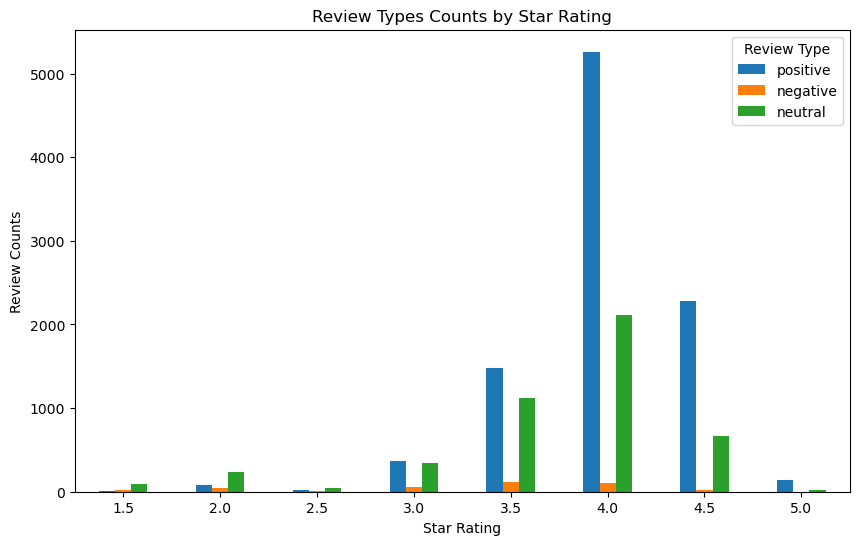

In [9]:
# Group the data by 'stars' and sum the review types for each star rating
grouped = business_df.groupby('stars').sum()[['positive', 'negative', 'neutral']]

# Plot
grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Review Types Counts by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Review Counts')
plt.xticks(rotation=0)
plt.legend(title='Review Type')

plt.show()